In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from fastai.metrics import *

In [3]:
bs = 128

In [4]:
data_dir = '../input/flowers/flowers/'
path = Path(data_dir)

In [5]:
path
path.ls()

[PosixPath('../input/flowers/flowers/daisy'),
 PosixPath('../input/flowers/flowers/tulip'),
 PosixPath('../input/flowers/flowers/sunflower'),
 PosixPath('../input/flowers/flowers/dandelion'),
 PosixPath('../input/flowers/flowers/rose')]

In [6]:
tfms = get_transforms(do_flip = True)
data = (ImageList.from_folder(path)
        .split_by_rand_pct()
        .label_from_folder()
        .transform(tfms, size=128)
        .databunch()).normalize(imagenet_stats)

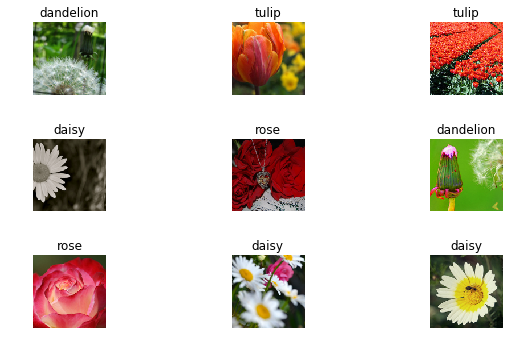

In [7]:
data.show_batch(rows = 3,figsize = (9,5))

In [8]:
learn = cnn_learner(data,models.resnet152,metrics = accuracy,model_dir = '/tmp/model/')

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /tmp/.torch/models/resnet152-b121ed2d.pth
241530880it [00:14, 17227378.97it/s]


In [9]:
print(data.classes)
len(data.classes),data.c

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


(5, 5)

In [10]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.699396,0.408220,0.861111,00:42
1,0.485706,0.363901,0.877315,00:37
2,0.361180,0.303196,0.887731,00:36
3,0.279261,0.298854,0.900463,00:36


In [11]:
Airlearn.save('model_1')

In [12]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

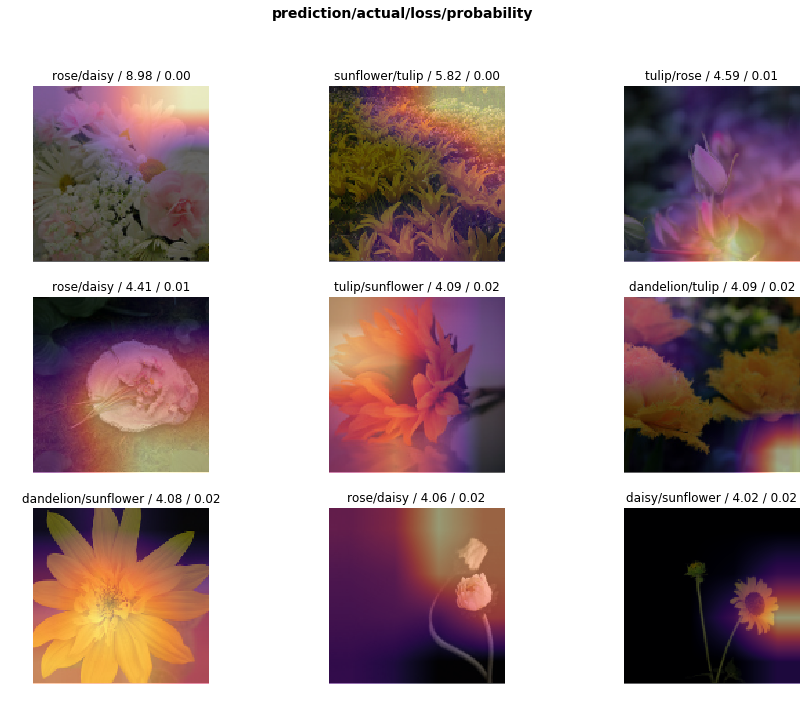

In [13]:
interp.plot_top_losses(9, figsize=(15,11))

In [14]:
doc(interp.plot_top_losses)
interp.most_confused(min_val=2)

[('tulip', 'rose', 11),
 ('sunflower', 'dandelion', 10),
 ('rose', 'tulip', 9),
 ('daisy', 'dandelion', 8),
 ('tulip', 'dandelion', 8),
 ('daisy', 'tulip', 6),
 ('daisy', 'rose', 4),
 ('dandelion', 'sunflower', 4),
 ('dandelion', 'tulip', 4),
 ('tulip', 'sunflower', 4),
 ('daisy', 'sunflower', 3),
 ('sunflower', 'daisy', 3),
 ('sunflower', 'tulip', 3),
 ('tulip', 'daisy', 3),
 ('dandelion', 'daisy', 2),
 ('rose', 'daisy', 2)]

In [16]:
learn.lr_find(num_it = 50)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


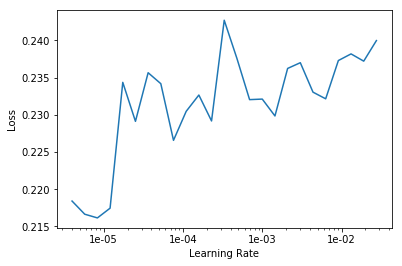

In [17]:
learn.recorder.plot()

In [18]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.235853,0.299160,0.893519,00:36
1,0.224352,0.280204,0.909722,00:37
2,0.207185,0.265658,0.905093,00:37
3,0.177612,0.259836,0.913194,00:37
4,0.143504,0.255733,0.916667,00:37
5,0.133772,0.252837,0.916667,00:37
6,0.108097,0.249793,0.914352,00:37
7,0.091501,0.242323,0.921296,00:37
8,0.086132,0.246282,0.917824,00:37
9,0.084628,0.246670,0.921296,00:38


In [19]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

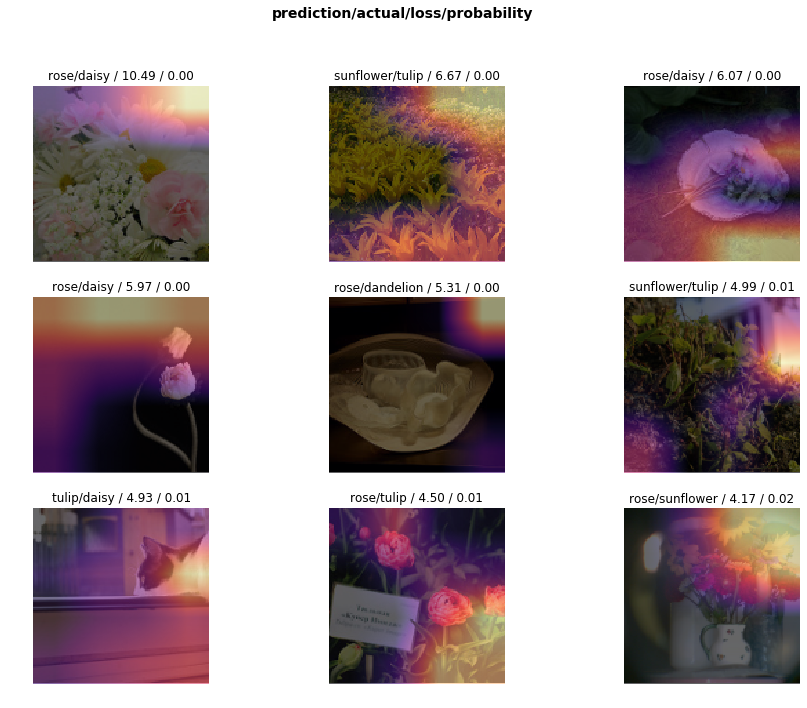

In [20]:
interp.plot_top_losses(9, figsize=(15,11))

In [21]:
doc(interp.plot_top_losses)
interp.most_confused(min_val=2)

[('tulip', 'rose', 11),
 ('daisy', 'tulip', 7),
 ('rose', 'tulip', 6),
 ('sunflower', 'dandelion', 5),
 ('tulip', 'sunflower', 5),
 ('daisy', 'dandelion', 4),
 ('daisy', 'rose', 4),
 ('dandelion', 'tulip', 4),
 ('daisy', 'sunflower', 3),
 ('dandelion', 'sunflower', 3),
 ('sunflower', 'tulip', 3),
 ('tulip', 'dandelion', 3),
 ('dandelion', 'daisy', 2),
 ('dandelion', 'rose', 2),
 ('rose', 'daisy', 2),
 ('tulip', 'daisy', 2)]